## Lab_3
*Sistemas operativos*
*Levis Javier Aguiar Torres*
*cc:* 1005664227

## Importar dependencias/librerias necesarias

In [ ]:
import subprocess
import time
import pandas as pd
import matplotlib.pyplot as plt

## Crear archivos copilados para ejecutar la soluciones propuesas en C

In [42]:
subprocess.run(["gcc", "-o", "pi_p", "pi_p.c", "-lm", "-lpthread"])

subprocess.run(["gcc", "-o", "pi_s", "pi.c", "-lm"])

subprocess.run(["gcc", "-o", "fibonacci", "fibonacci.c", "-lpthread"])

CompletedProcess(args=['gcc', '-o', 'fibonacci', 'fibonacci.c', '-lpthread'], returncode=0)

### Sección 1: Análisis de $\pi$


**Evaluación de $T_s$ (Tiempo Serial)**
 Reporte el tiempo de ejecución de `./pi_s` (con `n = 2000000000`). Este valor será $T_s$.

In [ ]:
start_time = time.time()

out = subprocess.run(["./pi_s"], capture_output=True, text=True)

end_time = time.time()

print(out.stdout)

Ts = end_time - start_time

**Evaluación de $T_p$ (Tiempo Paralelo)**
Ejecute `./pi_p` (con el mismo n) variando el número de hilos ($N = 1, 2, 4, 8, ...$ hasta $2 \times$ el número de núcleos de su CPU) y reporte los tiempos $T_p(N)$.

In [ ]:
hilos  = 12

n = []
Tp = []
speedup = []
eficiencia = []


for i in range(1, hilos + 1):


    start_time = time.time()

    out = subprocess.run(["./pi_p", str(i)], capture_output=True, text=True)

    end_time = time.time()

    time_taken = end_time - start_time

    n.append(i)
    Tp.append(time_taken)
    speedup.append(Ts/ time_taken)
    eficiencia.append((Ts / time_taken) / i)

    
df = pd.DataFrame({
    "Hilos": n,
    "Tiempo (s)": Tp,
    "Speedup": speedup,
    "Eficiencia": eficiencia
})

print(df)

**Gráfico de Speedup**: Incluya un gráfico de líneas (N Hilos vs. Speedup).

In [ ]:
# --- Gráfica Tiempo vs Hilos ---
plt.figure(figsize=(10,5))
plt.plot(df["Hilos"], df["Tiempo (s)"], marker='o', label="Tiempo de ejecución")
plt.xlabel("Número de hilos")
plt.ylabel("Tiempo (s)")
plt.title("Tiempo vs Hilos")
plt.grid(True)
plt.legend()
plt.show()

# --- Gráfica Speedup vs Hilos ---
plt.figure(figsize=(10,5))
plt.plot(df["Hilos"], df["Speedup"], marker='o', color='green', label="Speedup")
plt.xlabel("Número de hilos")
plt.ylabel("Speedup")
plt.title("Speedup vs Hilos")
plt.grid(True)
plt.legend()
plt.show()

# --- Gráfica Eficiencia vs Hilos ---
plt.figure(figsize=(10,5))
plt.plot(df["Hilos"], df["Eficiencia"], marker='o', color='orange', label="Eficiencia")
plt.xlabel("Número de hilos")
plt.ylabel("Eficiencia")
plt.title("Eficiencia vs Hilos")
plt.ylim(0, 1.1)
plt.grid(True)
plt.legend()
plt.show()

**Análisis de Resultados (Parte 1):**
   * Realice una comparación entre el rendimiento de $T_p(1)$ y $T_s$. Explique cualquier discrepancia (overhead).
   * Analice el Speedup máximo alcanzado. ¿Cómo se compara con el número de núcleos físicos de su sistema?
   * Describa la tendencia de la eficiencia a medida que $N$ incrementa y explique las causas de dicho comportamiento.

### Sección 2: Análisis de Fibonacci

**Resultados de Ejecución**: Incluya la salida de su programa `./fibonacci 15`.

    Tamaño  Tiempo (s)  Eficiencia
0        1    0.000971    1.000000
1        2    0.000765    0.634507
2        3    0.000609    0.531323
3        4    0.000673    0.360393
4        5    0.000652    0.297805
5        6    0.000652    0.248080
6        7    0.000623    0.222483
7        8    0.000630    0.192464
8        9    0.000598    0.180284
9       10    0.000628    0.154497
10      11    0.000628    0.140612
11      12    0.000743    0.108804
12      13    0.000754    0.099037
13      14    0.000704    0.098471
14      15    0.000596    0.108647


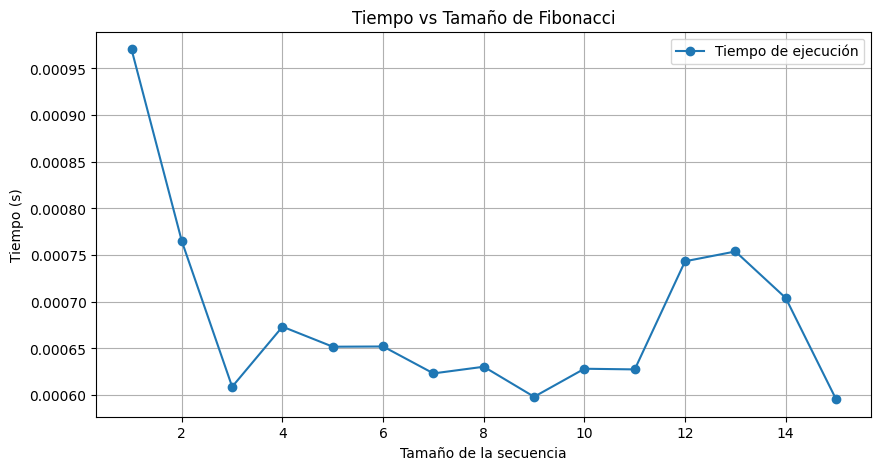

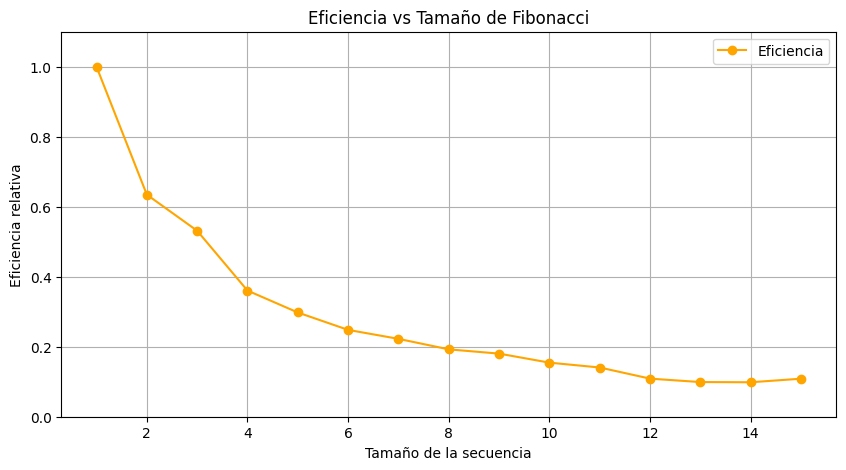

In [ ]:
size = 15

f_out_thread = []
f_out_time = []

for i in range(1, size + 1):

    start_time = time.time()

    out = subprocess.run(["./fibonacci", str(i)], capture_output=True, text=True)

    end_time = time.time()

    time_taken = end_time - start_time


    f_out_thread.append(i)
    f_out_time.append(time_taken)


df = pd.DataFrame({
    "Tamaño": f_out_thread,
    "Tiempo (s)": f_out_time
})

# Calcular eficiencia relativa (opcional)
T1 = df["Tiempo (s)"].iloc[0]  # tiempo con tamaño 1
df["Eficiencia"] = T1 / (df["Tamaño"] * df["Tiempo (s)"])

print(df)

# --- Gráfica Tiempo vs Tamaño ---
plt.figure(figsize=(10,5))
plt.plot(df["Tamaño"], df["Tiempo (s)"], marker='o', label="Tiempo de ejecución")
plt.xlabel("Tamaño de la secuencia")
plt.ylabel("Tiempo (s)")
plt.title("Tiempo vs Tamaño de Fibonacci")
plt.grid(True)
plt.legend()
plt.show()

# --- Gráfica Eficiencia vs Tamaño ---
plt.figure(figsize=(10,5))
plt.plot(df["Tamaño"], df["Eficiencia"], marker='o', color='orange', label="Eficiencia")
plt.xlabel("Tamaño de la secuencia")
plt.ylabel("Eficiencia relativa")
plt.title("Eficiencia vs Tamaño de Fibonacci")
plt.ylim(0,1.1)
plt.grid(True)
plt.legend()
plt.show()


**Análisis del Diseño (Parte 2)**:
   * Describa el mecanismo utilizado para transferir datos (el puntero al arreglo y $N$) del hilo principal al hilo trabajador.
   * Explique el rol de `pthread_join` como mecanismo de sincronización en este problema, asegurando que `main` no acceda a los resultados antes de que sean generados.